# 機械学習講座  Lab第１回


*******************************************************************************
code is modified and translated by Yuki Saito at 2020/12/12.
All rights are reseraved to Ecole Central de nantes L2SN and Keio University.
*******************************************************************************


# Introductory Lab1


このLabではpythonを用いた機械学習の基本的なライブラリ使用方法を学びます．
使用するライブラリは Numpy, と　Scikit-Learn です．
以上のライブラリーを用いて，機械学習の入門として登場する3種類のアルゴリズムを実装, 結果の考察をしてください．
最後のページに本章のまとめ問題があるので，理解度チェックに使ってください．

*   Linear Regression (単回帰モデル)
*   K-nearest neighbors (K近傍探索アルゴリズム)
*   Naive Bayes (単純ベイズ分類器)


**GOALS**: 

１）機械学習用のデータ分割手法を学ぶ

２）scikit-leaernを用いて3つの基本的なアルゴリズムのtrain, test方法を学ぶ

３）回帰(regression)と分類(classification)のタスクの違いを理解する



# Importing Modules

In [15]:
import numpy as np #scientific computing (in ML it handles and operates on multi-dimensional arrays)
import matplotlib.pyplot as plt #for data visualization
import sklearn #for Machine Learning
import pandas as pd #for reading, riting and processing databases 


# Loading and Splitting Data

教師あり学習の目的は

「学習データからデータ特徴を学び，未知のデータ(学習していないデータ)に対して
うまく推論をできるようにする(汎化性能を獲得する)」

ことです．
モデルを学習させる時の基本的なルールは手元にある全てのデータをtrain, testデータに分割することです．
一般的にtrain:test=8:2程度の割合で分割されることが多いです．
また，trainデータはさらにvalidationと呼ばれるセットにもしばし分割されます．validationはモデルの
ハイパーパラメータを学習時に決定するために必要なデータ組です．(trainデータのみだと今のハイパーパラメータでモデルを動かしたときにどの程度未知のデータにフィットするのか分からないから....)

まとめると，ハイパーパラメータを持つ機械学習モデルを学習する際には，
train:validation:test=6:2:2　程度のデータ分割を適用します．

*  **Training set** : モデルのパラメータを決定するために使う
*  **Validation set** : モデルのハイパーパラメータを決定するために使う
*  **Test set** : train, validationが終わった後に，モデルの能力をテストするために使う

### Datasets for Regression


In [16]:
from sklearn import datasets 
diabetes = datasets.load_diabetes()



# Explore on your own the dimensions of the dataset and their meaning? w
age = diabetes.data[:, np.newaxis, 0] 
sex = diabetes.data[:, np.newaxis, 1] 
bmi = diabetes.data[:, np.newaxis, 2] 
bp = diabetes.data[:, np.newaxis, 3] 
s1 = diabetes.data[:, np.newaxis, 4] 
s2 = diabetes.data[:, np.newaxis, 5] 
s3 = diabetes.data[:, np.newaxis, 6] 
s4 = diabetes.data[:, np.newaxis, 7] 
s5 = diabetes.data[:, np.newaxis, 8] 
s6 = diabetes.data[:, np.newaxis, 9] 
X = bmi #np.concatenate([bp, age, bmi], 1)

# SPLIT what is the effect of the following lines?
test_size=400
X_train = X[:-test_size]
X_test = X[-test_size:]
y_train = diabetes.target[:-test_size]
y_test = diabetes.target[-test_size:]

# Explore the data
# print(diabetes.DESCR) #Uncomment to see the dataset description
print(diabetes.feature_names)
print(diabetes.target.shape)
print('X train', X_train.shape)
print('X test',X_test.shape)
print('y train',y_train.shape)
print('y test',y_test.shape)



['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442,)
X train (42, 1)
X test (400, 1)
y train (42,)
y test (400,)


### Datasets for Classification

In [17]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

print(label_names)
print(labels.shape)
print(feature_names)
print(features.shape)
#print(data.DESCR) #Uncomment to see the dataset description

['malignant' 'benign']
(569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)


In [18]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(features,labels,test_size = 0.40, random_state = 42)


# Training a ML model

Scikit-Learnを用いるとモデルの学習する際のpythonコードは非常にシンプルです．

１）モデルをscikit-learnから読み込む

２）新しいモデルのインスタンスを生成する

３）パラメータを学習データを用いてフィットさせる

４）テストデータを使用してモデルの推論結果を計算する

以下のコードで，どのコードがどのステップに該当するのか
確認してみましょう．



### Model 1. Linear Regression

In [19]:
#Load and declare a new instance
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('モデルの係数)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
      

In [20]:
#Fit (train) the model 
regr.fit(X_train, y_train)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [887.13612938]
Intercept: 
 148.09965085613285


In [21]:
#Make predictions
y_pred = regr.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

In [22]:
#Evaluate the performance
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 3916.90
Variance score: 0.34


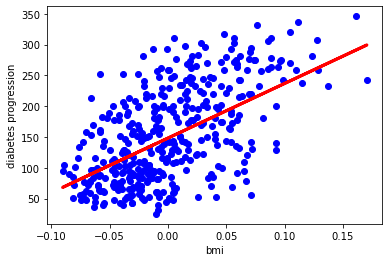

In [23]:
#Visualize 
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
#plt.xticks(())
#plt.yticks(())
plt.xlabel('bmi')
plt.ylabel('diabetes progression')
plt.show()

## Model 2. K-Nearest Neighbors Classifier

test accuracy id:1 0.945054945054945
test accuracy id:2 0.9175824175824175
test accuracy id:3 0.945054945054945
test accuracy id:4 0.9285714285714286
test accuracy id:5 0.9505494505494505
test accuracy id:6 0.9615384615384616
test accuracy id:7 0.9725274725274725
test accuracy id:8 0.9725274725274725
test accuracy id:9 0.9835164835164835
test accuracy id:10 0.989010989010989
test accuracy id:11 0.978021978021978
test accuracy id:12 0.978021978021978
test accuracy id:13 0.978021978021978
test accuracy id:14 0.9835164835164835
test accuracy id:15 0.9725274725274725
test accuracy id:16 0.9725274725274725
test accuracy id:17 0.9725274725274725
test accuracy id:18 0.9725274725274725
test accuracy id:19 0.9615384615384616
test accuracy id:20 0.967032967032967
test accuracy id:21 0.967032967032967
test accuracy id:22 0.967032967032967
test accuracy id:23 0.9560439560439561
test accuracy id:24 0.967032967032967
test accuracy id:25 0.9560439560439561
test accuracy id:26 0.9615384615384616
test 

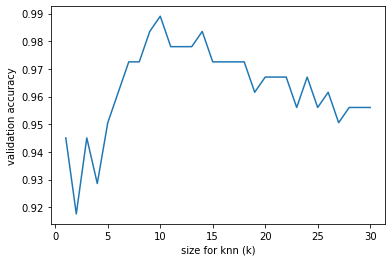

In [24]:
from sklearn.neighbors import KNeighborsClassifier

x=[]
y=[]
for k in range(30):
    k += 1
    X2_test_val, X2_test_test, y2_test_val, y2_test_test = train_test_split(X2_test, y2_test,test_size = 0.20, random_state = 42)
    knnClassifier = KNeighborsClassifier(n_neighbors=k)
    knnClassifier.fit(X2_train, y2_train)
    y2_pred_knn = knnClassifier.predict(X2_test_val)
    #Compute accuracy on the test set
    test_accuracy = knnClassifier.score(X2_test_val, y2_test_val) 
    print('test accuracy id:{}'.format(k),test_accuracy)
    x.append(k)
    y.append(test_accuracy)

import matplotlib.pyplot as plt 
left = np.array(x)
height = np.array(y)
plt.xlabel('size for knn (k)')
plt.ylabel('validation accuracy')
plt.plot(left, height)



knnClassifier = KNeighborsClassifier(n_neighbors=5)
knnClassifier.fit(X2_train, y2_train)
y2_pred_knn = knnClassifier.predict(X2_test)
print(y2_pred_knn)


In [12]:
#Compute accuracy on the training set
train_accuracy = knnClassifier.score(X2_train, y2_train)
    
#Compute accuracy on the test set
test_accuracy = knnClassifier.score(X2_test, y2_test) 

print('train accuracy', train_accuracy)
print('test accuracy',test_accuracy)

train accuracy 0.9149560117302052
test accuracy 0.956140350877193


## Model 3.Naive Bayes Classifier(単純ベイズ分類器)

In [13]:
from sklearn.naive_bayes import GaussianNB
import math
gnbClassifier = GaussianNB()
gnbClassifier.fit(X2_train,y2_train)
y2_pred_gnb = gnbClassifier.predict(X2_test)

#print('priterior probability P(y=Ck | x_1,x_2…,x_D) = ',gnbClassifier.predict_proba(X2_test))
#print('prior probabiity for each class P(y=Ck) = ', gnbClassifier.class_prior_)
#print('gaussian distibution : sigma={}, theta={}'.format(gnbClassifier.sigma_, gnbClassifier.theta_)) 
gaussian_0 = np.sum((1/(gnbClassifier.sigma_[0]*np.power(2*math.pi, 30)))*np.exp(-np.power(X2_test-gnbClassifier.theta_[0],2)/(2*gnbClassifier.sigma_[0])), 1)
gaussian_1 = np.sum((1/(gnbClassifier.sigma_[1]*np.power(2*math.pi, 30)))*np.exp(-np.power(X2_test-gnbClassifier.theta_[1],2)/(2*gnbClassifier.sigma_[1])), 1)
gaussian = np.stack([gaussian_0, gaussian_1], 1)
#print('Π P(xd|y=Ck) based on gaussian distibution = ', gaussian) 

priterior probability P(y=Ck | x_1,x_2…,x_D) =  [[2.71573455e-009 9.99999997e-001]
 [1.00000000e+000 4.09412055e-061]
 [1.00000000e+000 4.31077847e-010]
 [2.03494629e-011 1.00000000e+000]
 [3.61176063e-014 1.00000000e+000]
 [1.00000000e+000 1.42174630e-104]
 [1.00000000e+000 7.10826681e-136]
 [1.00000000e+000 1.07285461e-019]
 [2.56960353e-001 7.43039647e-001]
 [5.15136832e-013 1.00000000e+000]
 [1.33749142e-012 1.00000000e+000]
 [1.00000000e+000 4.65745137e-018]
 [5.21176591e-011 1.00000000e+000]
 [1.00000000e+000 1.88388254e-010]
 [1.66838442e-013 1.00000000e+000]
 [1.00000000e+000 2.11252061e-040]
 [3.61229880e-012 1.00000000e+000]
 [1.75980793e-016 1.00000000e+000]
 [2.02065527e-013 1.00000000e+000]
 [1.00000000e+000 4.32871082e-068]
 [5.24151890e-006 9.99994758e-001]
 [3.89959360e-013 1.00000000e+000]
 [1.00000000e+000 1.51441031e-090]
 [3.51645755e-016 1.00000000e+000]
 [1.75591242e-014 1.00000000e+000]
 [7.76727035e-012 1.00000000e+000]
 [1.29408755e-012 1.00000000e+000]
 [9.170

In [14]:
y2_pred_gnb = gnbClassifier.predict(X2_test)

#Compute accuracy on the training set
train_accuracy = knnClassifier.score(X2_train, y2_train)
    
#Compute accuracy on the test set
test_accuracy = knnClassifier.score(X2_test, y2_test) 

print('train accuracy', train_accuracy)
print('test accuracy',test_accuracy)

train accuracy 0.9149560117302052
test accuracy 0.956140350877193


# QUESTIONS


1.   なぜ学習時にデータ分割をしないで手持ちのデータを全て学習に使用してしまうのは間違いなのですか？


2.   Regression(回帰)モデルで，学習データの数を変えたとき，どのような傾向が得られますか？実際に学習データサイズを変えて学習データに対するerror率，テストデータに対するerror率をグラフplotしてください．



3.   Regression(回帰)モデルの上記例では，bmiしか特徴を使用していません．他の特徴を使用したときにどのような効果があるのか実験，考察してください．


4.   学習させたモデルが上手くいっている(パフォーマンスが高い)ことを判定するには，どうすれば良いですか？


5.   分類(classification)タスクを解く際に，今回学んだ３種類のアルゴリズムのうちどのアルゴリズムが適していますか？


6.   ３種類のアルゴリズムのうち，validationデータを使用すべきアルゴリズムはどれですか？


7.   KNNにおいて，どのようにすれば適切なkのサイズを決定できますか？ 


8.   単純ベイズ分類器(Naive classifiers)は確率を用いた分類器です．どのようにすれば学習させたモデルの確率情報を復元できますか？また，どのような値が復元されますか？





応用問題(余力があれば！)
9.   線形モデルは一般に回帰問題に使用され，KNNや単純ベイズ分類器は分類問題に使用されます．線形モデルを分類問題に使用することはできますか？また，KNNや単純ベイズ分類器を回帰問題に使用することはできますか？

